# Linear regression on car dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [2]:
df = pd.read_csv("car.csv")
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
3474,Dodge,Dakota,2010,regular unleaded,210.0,6.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Compact,Extended Cab Pickup,18,14,1851,27005
5893,Subaru,Impreza,2017,regular unleaded,152.0,4.0,AUTOMATIC,all wheel drive,4.0,Hatchback,Compact,4dr Hatchback,35,27,640,23295
6631,Porsche,Macan,2017,premium unleaded (required),340.0,6.0,AUTOMATED_MANUAL,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,23,17,1715,54400
927,Porsche,911,2015,premium unleaded (required),520.0,6.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,24,17,1715,151100
4174,Cadillac,Escalade,2017,premium unleaded (recommended),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,"Luxury,Performance",Large,4dr SUV,22,15,1624,82895


In [3]:
print(df.shape) #view the dataset shape
print(df['Make'].value_counts()) #viewing car companies with their car number

(11914, 16)
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             

In [4]:
new_df = df[df['Make'] == 'Volkswagen'] #in this new dataset we only take 'Volkswagen'
print(new_df.shape, "\n") #viewing the shape of dataset
print(new_df.isnull().sum()) #checking for null values 

(809, 16) 

Make                   0
Model                  0
Year                   0
Engine Fuel Type       0
Engine HP              0
Engine Cylinders       4
Transmission Type      0
Driven_Wheels          0
Number of Doors        0
Market Category      224
Vehicle Size           0
Vehicle Style          0
highway MPG            0
city mpg               0
Popularity             0
MSRP                   0
dtype: int64


In [5]:
new_df = new_df.dropna() #deleteing the rows which have null values
print(new_df.shape, "\n") #after deletion viewing the shape
print(new_df.isnull().sum()) #checking for null values 
new_df.sample(3) #checking the random dataset sample

(581, 16) 

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6102,Volkswagen,Jetta,2015,premium unleaded (recommended),210.0,4.0,MANUAL,front wheel drive,4.0,"Factory Tuner,Performance",Midsize,Sedan,33,23,873,26920
8626,Volkswagen,Routan,2012,flex-fuel (unleaded/E85),283.0,6.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Passenger Minivan,25,17,873,32010
6037,Volkswagen,Jetta GLI,2014,premium unleaded (recommended),210.0,4.0,MANUAL,front wheel drive,4.0,Performance,Midsize,Sedan,33,23,873,24535


In [6]:
#we only take Engine HP and MSRP
new_df = new_df[['Engine HP', 'MSRP']]
new_df.sample(5)

,Engine HP,MSRP
5410,220.0,31990
5414,292.0,39090
7479,280.0,36835
2410,200.0,37820
10542,240.0,54950


In [7]:
X = np.array(new_df[['Engine HP']]) #sorting into X the 'Engine HP'
print(X.shape)
Y = np.array(new_df[['MSRP']]) # sorting into Y the 'MSRP'
print(Y.shape)

(581, 1)
(581, 1)


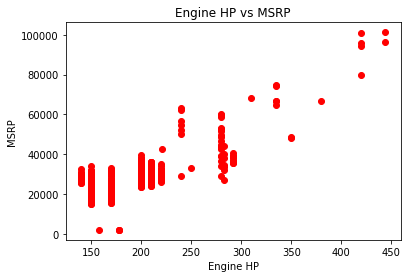

In [8]:
plt.scatter(X,Y,color="red") # Plot a graph X vs Y
plt.title('Engine HP vs MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

In [9]:
#spliting into train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 15)
regressor = LinearRegression() #creating a regressior
regressor.fit(X_train, Y_train) #Fiting the dataset into the model

LinearRegression()

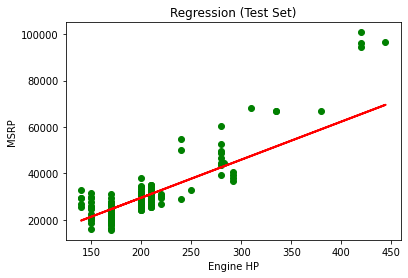

In [10]:
#plot a graph with X_test and Y_test
plt.scatter(X_test, Y_test, color = "green")
#regression line
plt.plot(X_train, regressor.predict(X_train), color = "red", linewidth = 2)
plt.title('Regression (Test Set)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

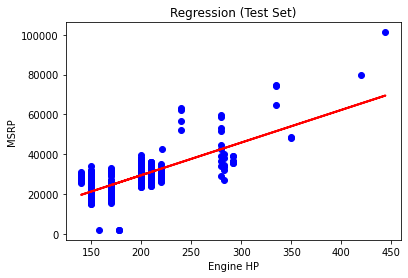

In [11]:
#plot a graph with X_train and Y_train
plt.scatter(X_train, Y_train, color = "blue")
#regression line
plt.plot(X_train, regressor.predict(X_train), color = "red", linewidth = 2)
plt.title('Regression (Test Set)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

In [12]:
Y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(Y_test, Y_pred)) # Priniting R2 Score
print('Mean squared Error :',mean_squared_error(Y_test, Y_pred)) # Priniting the mean error

R2 score: 0.73
Mean squared Error : 55796476.511791624


In [13]:
def car_price(hp): # A function to predict the price according to Horsepower
    result = regressor.predict(np.array(hp).reshape(1, -1))
    return(result[0,0])
car_hp = int(input('Enter Volkswagen cars Horse Power : '))
print('This Volkswagen Prce will be : ',int(car_price(car_hp)))

Enter Volkswagen cars Horse Power : 225
This Volkswagen Prce will be :  33568
